# NLP applications with Transformers

## Leveraging Transformers Pipelines

__Here you will leverage various transformer pipelines to solve real-world problems__

Pipelines encapsulate the overall process of every NLP process:

 1. *Tokenization*: Split the initial input into multiple sub-entities with ... properties (i.e. tokens).
 2. *Inference*: Maps every tokens into a more meaningful representation.
 3. *Decoding*: Use the above representation to generate and/or extract the final output for the underlying task.

The overall API is exposed to the end-user through the `pipeline()` method with the following
structure:

```python
from transformers import pipeline

# Using default model and tokenizer for the task
pipeline("<task-name>")

# Using a user-specified model
pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```


These models are already fine-tuned models for specific tasks available in huggingface hub

___[Created By: Dipanjan (DJ)](https://www.linkedin.com/in/dipanjans/)___

### Install dependencies

In [1]:
from transformers import pipeline
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

# 1. Customer Feedback Analytics

Scenario: You are working for a retail company which stocks various products. You will try to use tranformer LLMs here to extract sentiment and emotion from customer reviews

## Example Demo:

In [3]:
sample_reviews = [
    "The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.",
    "The EverGreen plant fertilizer is magic in a bottle! Within weeks of using it, my plants have shown significant growth and look healthier than ever. A thumbs up from an avid gardener.",
    "Purchased the NovaTech laptop last month, and it's been a smooth experience. The processing speed is fast, and the graphics are stunning. Best decision for my work and gaming needs.",
    "The StarGlow nightlight looked promising, but it's far dimmer than advertised. Doesn't serve the purpose at all. Quite disappointed."
]

sample_review_df = pd.DataFrame(sample_reviews, columns=['review'])
sample_review_df

,review
0,The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.
1,"The EverGreen plant fertilizer is magic in a bottle! Within weeks of using it, my plants have shown significant growth and look healthier than ever. A thumbs up from an avid gardener."
2,"Purchased the NovaTech laptop last month, and it's been a smooth experience. The processing speed is fast, and the graphics are stunning. Best decision for my work and gaming needs."
3,"The StarGlow nightlight looked promising, but it's far dimmer than advertised. Doesn't serve the purpose at all. Quite disappointed."


### Load a sentiment analysis transformer model

In [4]:
sentiment_model = pipeline('sentiment-analysis', device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### Perform sentiment analysis for given reviews

In [5]:
reviews = sample_review_df['review'].values
reviews

array(['The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.',
       'The EverGreen plant fertilizer is magic in a bottle! Within weeks of using it, my plants have shown significant growth and look healthier than ever. A thumbs up from an avid gardener.',
       "Purchased the NovaTech laptop last month, and it's been a smooth experience. The processing speed is fast, and the graphics are stunning. Best decision for my work and gaming needs.",
       "The StarGlow nightlight looked promising, but it's far dimmer than advertised. Doesn't serve the purpose at all. Quite disappointed."],
      dtype=object)

In [6]:
reviews[0]

'The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.'

In [7]:
sentiment_model(reviews[0])

[{'label': 'NEGATIVE', 'score': 0.9995445609092712}]

In [8]:
sentiment_model(reviews[0])[0]['label']

'NEGATIVE'

In [9]:
sentiments = []

for review in reviews:
  sentiments.append(sentiment_model(review)[0]['label'])

sentiments

['NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE']

In [10]:
sample_review_df['sentiment'] = sentiments
sample_review_df

,review,sentiment
0,The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.,NEGATIVE
1,"The EverGreen plant fertilizer is magic in a bottle! Within weeks of using it, my plants have shown significant growth and look healthier than ever. A thumbs up from an avid gardener.",POSITIVE
2,"Purchased the NovaTech laptop last month, and it's been a smooth experience. The processing speed is fast, and the graphics are stunning. Best decision for my work and gaming needs.",POSITIVE
3,"The StarGlow nightlight looked promising, but it's far dimmer than advertised. Doesn't serve the purpose at all. Quite disappointed.",NEGATIVE


### Load an emotion detector transformer model

In [11]:
emotion_model = pipeline('sentiment-analysis',
                         model='SamLowe/roberta-base-go_emotions',
                         device=0)

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

### Perform emotion analysis for given reviews

In [12]:
emotions = []

for review in reviews:
  emotions.append(emotion_model(review)[0]['label'])

emotions

['disappointment', 'admiration', 'admiration', 'disappointment']

In [13]:
sample_review_df['emotion'] = emotions
sample_review_df

,review,sentiment,emotion
0,The PureTaste kitchen blender is far from efficient. It struggles with even soft fruits and often overheats. I had to return it within a week.,NEGATIVE,disappointment
1,"The EverGreen plant fertilizer is magic in a bottle! Within weeks of using it, my plants have shown significant growth and look healthier than ever. A thumbs up from an avid gardener.",POSITIVE,admiration
2,"Purchased the NovaTech laptop last month, and it's been a smooth experience. The processing speed is fast, and the graphics are stunning. Best decision for my work and gaming needs.",POSITIVE,admiration
3,"The StarGlow nightlight looked promising, but it's far dimmer than advertised. Doesn't serve the purpose at all. Quite disappointed.",NEGATIVE,disappointment


### Plot some basic visuals

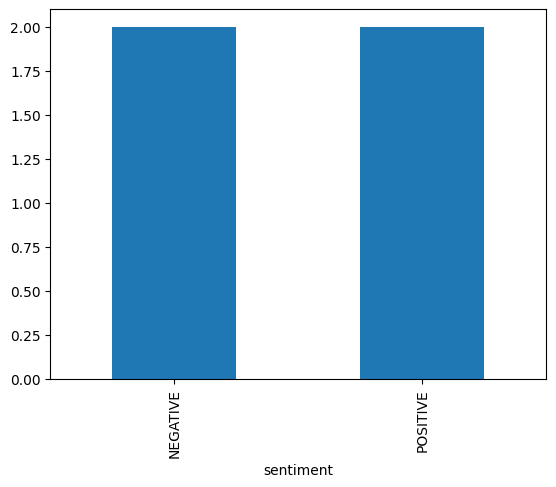

In [14]:
sample_review_df['sentiment'].value_counts().plot(kind='bar');

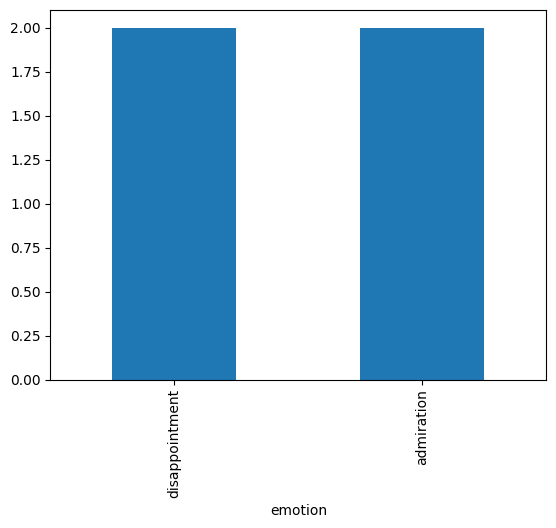

In [15]:
sample_review_df['emotion'].value_counts().plot(kind='bar');

## Your Turn:

Given more customer reviews, repeat the same analytics which we showed you above.

1. For each review get the sentiment and emotion using the same models
2. Store the emotion and sentiment in separate columns in the dataframe
3. Show the dataframe with all the columns
4. Create basic visuals

In [16]:
reviews = [
    "I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price.",
    "The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown.",
    "Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand.",
    "Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment.",
    "The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.",
    "I was skeptical about the QuickCook microwave oven initially, but it has surpassed all my expectations. The multi-function features and quick heating technology are truly innovative. A must-have in every kitchen!",
    "The Prestige juicer is a disappointment. It constantly gets jammed, and cleaning it is a nightmare. I regret this purchase.",
    "I recently purchased the AquaBliss water filter, and I'm genuinely impressed! Not only was the installation straightforward, but the water tastes remarkably fresh. Highly recommended for anyone wanting pure drinking water.",
    "The SoundWave headphones are a game-changer. They fit comfortably, and the noise-cancellation feature is top-notch. I can finally enjoy my music without any interruptions.",
    "The GlamorEyes mascara is terrible. It clumps easily and doesn't provide the volume it promises. Definitely won't be repurchasing.",
    "The StreamLine smartwatch is a fantastic addition to my tech collection. It tracks my health metrics accurately, and the battery life is commendable. It's stylish and functional.",
    "I've been using the SilkSoft hair conditioner for the past two weeks, and my hair has never felt better. It's silky, tangle-free, and smells divine. Highly recommend for those with frizzy hair.",
    "The LuxeShine nail polish chips easily and doesn't last more than a day. The colors are lovely, but the quality leaves much to be desired.",
    "Tried the PowerPulse wireless earbuds, and they keep disconnecting randomly. The sound quality is also underwhelming. Not what I expected for the price.",
    "The ZoomDrive USB stick is both compact and efficient. Transferring files has never been faster, and its durable design ensures I don't have to worry about data loss.",
    "Opted for the FreshBreeze air purifier, and it has made a noticeable difference in my home. Allergies are at bay, and the air feels cleaner and fresher.",
    "The ClearVue window cleaner left streaks on my windows. I had to redo the cleaning with another product. It's more hassle than it's worth.",
    "The MegaGrill BBQ set looked sturdy online, but in reality, it's flimsy and poorly constructed. Cooking on it has been a challenge.",
    "The UrbanWalk sneakers are not only trendy but also incredibly comfortable. I've worn them for both workouts and casual outings, and they've been perfect for both.",
    "The SwiftWrite pen set is not worth the money. The ink smudges, and the pens run out way too quickly. I'll be looking for alternatives."
]

review_df = pd.DataFrame(reviews, columns=['review'])
review_df.head()

,review
0,"I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price."
1,"The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown."
2,"Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand."
3,"Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment."
4,The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.


In [17]:
reviews = review_df['review'].values

sentiments = []
emotions = []

for review in reviews:
  sentiments.append(sentiment_model(review)[0]['label'])
  emotions.append(emotion_model(review)[0]['label'])

review_df['sentiment'] = sentiments
review_df['emotion'] = emotions

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [18]:
review_df

,review,sentiment,emotion
0,"I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price.",NEGATIVE,disappointment
1,"The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown.",NEGATIVE,disappointment
2,"Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand.",NEGATIVE,confusion
3,"Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment.",POSITIVE,approval
4,The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.,POSITIVE,admiration
5,"I was skeptical about the QuickCook microwave oven initially, but it has surpassed all my expectations. The multi-function features and quick heating technology are truly innovative. A must-have in every kitchen!",POSITIVE,admiration
6,"The Prestige juicer is a disappointment. It constantly gets jammed, and cleaning it is a nightmare. I regret this purchase.",NEGATIVE,disappointment
7,"I recently purchased the AquaBliss water filter, and I'm genuinely impressed! Not only was the installation straightforward, but the water tastes remarkably fresh. Highly recommended for anyone wanting pure drinking water.",POSITIVE,admiration
8,"The SoundWave headphones are a game-changer. They fit comfortably, and the noise-cancellation feature is top-notch. I can finally enjoy my music without any interruptions.",POSITIVE,joy
9,The GlamorEyes mascara is terrible. It clumps easily and doesn't provide the volume it promises. Definitely won't be repurchasing.,NEGATIVE,disapproval


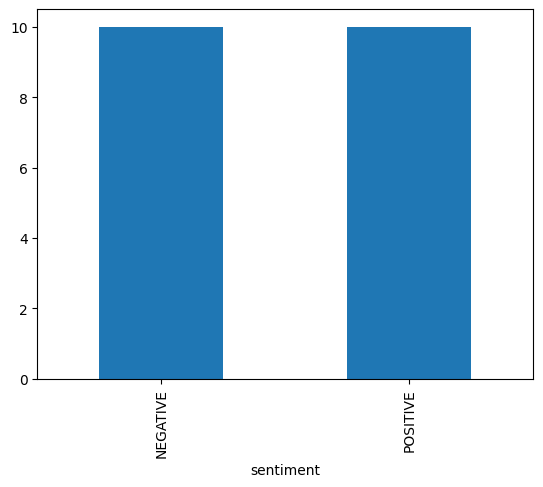

In [19]:
review_df['sentiment'].value_counts().plot(kind='bar');

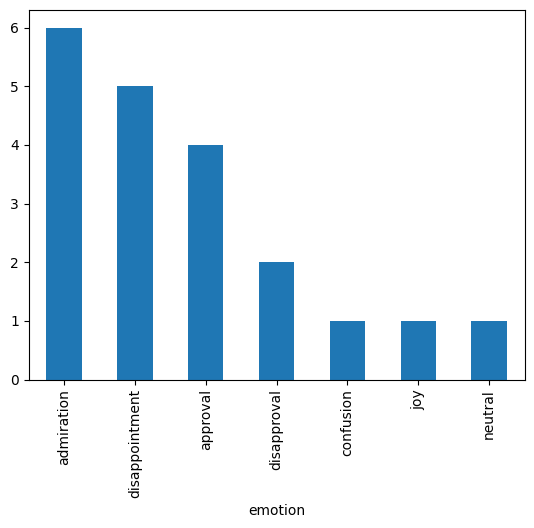

In [20]:
review_df['emotion'].value_counts().plot(kind='bar');

# 2. Medical Report Q&A and Summary

Scenario: You are working for a healthcare company and you need to quickly create a report summary for a brain cancer report and also test the feasibility of a chatbot.

## Your Turn:

Use the models mentioned below and try Q&A and Summarization

### Question Answering

Use the model and the context report provided and ask the following questions and see what answers you get

1. What is cancer?
2. What is brain cancer?
3. What are traditional methods to detect brain cancer?
4. What is Magnetic Resonance Imaging?
5. What is biopsy?
6. What can AI do for brain cancer?
7. How can deep learning be used for brain cancer?

In [21]:
nlp_qa = pipeline('question-answering',
                  model='deepset/roberta-base-squad2',
                  device=0)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [22]:
context = """
Cancer Detection for the Brain: An Overview of Modern Methods and the Role of Computer Vision

Cancer, a group of diseases characterized by the uncontrolled growth and spread of abnormal cells, has long been a significant concern in medical science. Among the various types of cancer, brain cancer is particularly alarming due to its location in the central nervous system. Detecting brain cancer early is crucial, as it significantly improves the chances of successful treatment and patient survival. This essay will delve into the methods available for detecting brain cancer, emphasizing early detection techniques and the growing role of computer vision in this arena.

1. Traditional Detection Methods:
a. Magnetic Resonance Imaging (MRI): This is the most commonly used technique for diagnosing brain tumors. MRI uses powerful magnets and radio waves to produce detailed images of the brain. These images can help identify abnormal growths, which may then be biopsied for confirmation.

b. Computed Tomography (CT) Scan: Although not as detailed as MRI, CT scans are faster and can provide valuable information about the presence and location of tumors. They use X-rays to produce cross-sectional images of the brain.

c. Biopsy: A biopsy is the removal of a small amount of tissue for examination under a microscope. This is the most definitive way to diagnose cancer. Surgeons usually perform biopsies using a needle or during surgery.

2. Early Detection Techniques:
a. Advanced Imaging: Advanced MRI techniques, such as functional MRI (fMRI) and magnetic resonance spectroscopy (MRS), can detect early changes in the brain's functionality or chemistry, even before a tumor becomes apparent.

b. Liquid Biopsy: This is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells. While still in the research phase for brain cancer, it holds promise for early detection.

c. Neurological Exams: Regular neurological exams can catch subtle changes in brain function, such as coordination, memory, or reflexes, which might be indicative of a developing tumor.

3. Computer Vision and Brain Cancer Detection:
With the advancement of artificial intelligence (AI) and machine learning, computer vision has emerged as a potent tool in the medical field, especially in cancer detection.

a. Image Segmentation: Computer vision algorithms can segment MRI or CT scan images to highlight potential tumor regions accurately. This can be particularly useful in identifying small tumors that might be overlooked by the human eye.

b. Predictive Analysis: Using vast datasets, computer vision systems can predict the likelihood of a tumor being malignant or benign. This assists doctors in deciding whether a biopsy is necessary.

c. Automated Monitoring: By comparing current images with previous scans, computer vision can detect minute changes over time, enabling the identification of tumors at a very early stage.

d. Enhanced Visualization: Computer vision can enhance the visualization of scans, making it easier for radiologists to interpret the results. Techniques like deep learning can amplify the differences between healthy and cancerous tissues.

In conclusion, while traditional methods of brain cancer detection remain foundational, the integration of modern techniques, especially computer vision, is revolutionizing the early detection and diagnosis of this life-threatening disease. The synergy of human expertise and machine precision promises a brighter future for patients at risk of brain cancer. As research progresses and technology becomes more advanced, we can anticipate even more accurate and early detection methods, potentially saving countless lives.
"""

In [23]:
nlp_qa(context=context, question='What is cancer?')

{'score': 0.4445130527019501,
 'start': 104,
 'end': 193,
 'answer': 'a group of diseases characterized by the uncontrolled growth and spread of abnormal cells'}

In [24]:
nlp_qa(context=context, question='What is brain cancer?')

{'score': 0.012176652438938618,
 'start': 3409,
 'end': 3433,
 'answer': 'life-threatening disease'}

In [25]:
nlp_qa(context=context, question='What are traditional methods to detect brain cancer?')

{'score': 0.39552855491638184,
 'start': 712,
 'end': 745,
 'answer': 'Magnetic Resonance Imaging (MRI):'}

In [26]:
nlp_qa(context=context, question='What is Magnetic Resonance Imaging?')

{'score': 0.23268187046051025,
 'start': 754,
 'end': 814,
 'answer': 'the most commonly used technique for diagnosing brain tumors'}

In [27]:
nlp_qa(context=context, question='What is biopsy?')

{'score': 0.23603910207748413,
 'start': 1249,
 'end': 1323,
 'answer': 'the removal of a small amount of tissue for examination under a microscope'}

In [28]:
nlp_qa(context=context, question='What can AI do for brain cancer?')

{'score': 0.017013605684041977,
 'start': 3351,
 'end': 3400,
 'answer': 'revolutionizing the early detection and diagnosis'}

In [29]:
nlp_qa(context=context, question='How can deep learning be used for brain cancer?')

{'score': 0.17081789672374725,
 'start': 3130,
 'end': 3191,
 'answer': 'amplify the differences between healthy and cancerous tissues'}

### Summarization

Use the model mentioned below and summarize the brain cancer report from above

In [30]:
summarizer = pipeline('summarization',
                      model='philschmid/bart-large-cnn-samsum',
                      device=0)

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [31]:
result = summarizer(context)

In [32]:
result

[{'summary_text': 'Brain cancer is a cancer of the central nervous system. Detecting it early improves the chances of successful treatment and patient survival. Magnetic Resonance Imaging (MRI) is the most commonly used technique for diagnosing brain tumors. Computed tomography (CT) scans are faster and provide valuable information about the presence and location of tumors. Liquid biopsy is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells. Neurological exams can detect subtle changes in brain function. Computer vision has emerged as a potent tool in the medical field.'}]

In [33]:
from IPython.display import Markdown, display

summary = result[0]['summary_text']
display(summary)

'Brain cancer is a cancer of the central nervous system. Detecting it early improves the chances of successful treatment and patient survival. Magnetic Resonance Imaging (MRI) is the most commonly used technique for diagnosing brain tumors. Computed tomography (CT) scans are faster and provide valuable information about the presence and location of tumors. Liquid biopsy is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells. Neurological exams can detect subtle changes in brain function. Computer vision has emerged as a potent tool in the medical field.'

# 3. News Categorization

Scenario: You are working for a news website who wants to stop frustrated people from sitting and manually categorizing news articles in specific category sections in its website, so they can help with creating more content and be happy!

Here you as an AI expert will try to use a zero-shot transformer LLM to do news categorization for three major news categories - sports, business and technology.

## Example Demo:

### Load the zero shot model

In [34]:
categorizer = pipeline('zero-shot-classification',
                       device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

### View the sample news articles

In [35]:
# Sample data with fictitious names for 5 articles
data = {
    "news_article": [
        "Riverside Roarers clinch victory in the regional football finals!",
        "Tech giant NeoTech announces its latest smartphone, the NeoTech Ultra.",
        "Stock markets see a steady rise, with BlueChip Enterprises leading the rally.",
        "InnovateSoft unveils a groundbreaking app that aids remote learning.",
        "Commodities market shaken as precious metal prices fluctuate unexpectedly."
    ],
    "actual_category": [
        "sports",
        "technology",
        "business",
        "technology",
        "business"
    ]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

,news_article,actual_category
0,Riverside Roarers clinch victory in the regional football finals!,sports
1,"Tech giant NeoTech announces its latest smartphone, the NeoTech Ultra.",technology
2,"Stock markets see a steady rise, with BlueChip Enterprises leading the rally.",business
3,InnovateSoft unveils a groundbreaking app that aids remote learning.,technology
4,Commodities market shaken as precious metal prices fluctuate unexpectedly.,business


### Perform text categorization

In [36]:
news_categories = ['sports', 'business', 'technology']

In [37]:
articles = df['news_article'].values
articles

array(['Riverside Roarers clinch victory in the regional football finals!',
       'Tech giant NeoTech announces its latest smartphone, the NeoTech Ultra.',
       'Stock markets see a steady rise, with BlueChip Enterprises leading the rally.',
       'InnovateSoft unveils a groundbreaking app that aids remote learning.',
       'Commodities market shaken as precious metal prices fluctuate unexpectedly.'],
      dtype=object)

In [38]:
articles[0]

'Riverside Roarers clinch victory in the regional football finals!'

In [39]:
categorizer(articles[0], news_categories)

{'sequence': 'Riverside Roarers clinch victory in the regional football finals!',
 'labels': ['sports', 'business', 'technology'],
 'scores': [0.9658721089363098, 0.02584036812186241, 0.008287522941827774]}

In [40]:
categorizer(articles, news_categories)['labels'][0]

'sports'

In [41]:
predicted_categories = []

for article in articles:
    predicted_categories.append(categorizer(article, news_categories)['labels'][0])

predicted_categories

['sports', 'technology', 'business', 'technology', 'business']

### Compare human labeled and AI model labeled categories

In [42]:
df['predicted_category'] = predicted_categories
df

,news_article,actual_category,predicted_category
0,Riverside Roarers clinch victory in the regional football finals!,sports,sports
1,"Tech giant NeoTech announces its latest smartphone, the NeoTech Ultra.",technology,technology
2,"Stock markets see a steady rise, with BlueChip Enterprises leading the rally.",business,business
3,InnovateSoft unveils a groundbreaking app that aids remote learning.,technology,technology
4,Commodities market shaken as precious metal prices fluctuate unexpectedly.,business,business


## Your turn:

For the following news articles, perform the same exercise as shown above

In [43]:
# Sample data with fictitious names
data = {
    "news_article": [
        "Local team, the Riverside Roarers, wins the national championship!",
        "Olympics postponed due to unforeseen circumstances, world athletes in shock.",
        "New athletic shoes by SportsMaster promise better performance for athletes.",
        "Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.",
        "Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",
        "Latest quarterly reports show unexpected profits for FinCorp Industries.",
        "Revolutionary new AI tech from AIRevolution promises to change the way we work.",
        "Major tech conference TechFest 2023 postponed due to health concerns.",
        "Breakthrough in quantum computing achieved by Pinnacle University researchers.",
        "Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold."
    ],
    "actual_category": [
        "sports",
        "sports",
        "sports",
        "business",
        "business",
        "business",
        "technology",
        "technology",
        "technology",
        "business"
    ]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

,news_article,actual_category
0,"Local team, the Riverside Roarers, wins the national championship!",sports
1,"Olympics postponed due to unforeseen circumstances, world athletes in shock.",sports
2,New athletic shoes by SportsMaster promise better performance for athletes.,sports
3,Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.,business
4,"Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",business
5,Latest quarterly reports show unexpected profits for FinCorp Industries.,business
6,Revolutionary new AI tech from AIRevolution promises to change the way we work.,technology
7,Major tech conference TechFest 2023 postponed due to health concerns.,technology
8,Breakthrough in quantum computing achieved by Pinnacle University researchers.,technology
9,"Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold.",business


In [44]:
news_categories

['sports', 'business', 'technology']

In [45]:
articles = df['news_article'].values
predicted_categories = []

for article in articles:
    predicted_categories.append(categorizer(article, news_categories)['labels'][0])

df['predicted_category'] = predicted_categories
df

,news_article,actual_category,predicted_category
0,"Local team, the Riverside Roarers, wins the national championship!",sports,sports
1,"Olympics postponed due to unforeseen circumstances, world athletes in shock.",sports,sports
2,New athletic shoes by SportsMaster promise better performance for athletes.,sports,sports
3,Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.,business,business
4,"Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",business,technology
5,Latest quarterly reports show unexpected profits for FinCorp Industries.,business,business
6,Revolutionary new AI tech from AIRevolution promises to change the way we work.,technology,technology
7,Major tech conference TechFest 2023 postponed due to health concerns.,technology,technology
8,Breakthrough in quantum computing achieved by Pinnacle University researchers.,technology,technology
9,"Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold.",business,business
